In [2]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)

## CIFAR - 10

CIFAR-10 je súbor RGB obrázkov, ktoré sú označené jednou z 10 tried. Bol vyvinutý výskumníkmi z Kanadského inštitútu pre pokročilý výskum (CIFAR). Súbor pozostáva z 60 000 farebných trénovacích obrázkov veľkosti 32x32 a 10 000 testovacích obrázkov, pričom v každej z 10 tried je 6 000 obrázkov. Triedy sú lietadlo, automobil, vták, mačka, jeleň, pes, žaba, kôň, loď a kamión.

Keďže pracujeme s farebnými obrázkami redukciu dimenzií pomocou PCA vykonáme pre každý farebný kanál zvlášť a na konci kanály zlúčime.

In [3]:
test_set = CIFAR10('./data', train=False, download=True)
test_set = test_set.data[:2000].astype(np.float32)

Files already downloaded and verified


In [4]:
print(test_set.shape)
print(type(test_set[0]))
test_set[0]

(2000, 32, 32, 3)
<class 'numpy.ndarray'>


array([[[158., 112.,  49.],
        [159., 111.,  47.],
        [165., 116.,  51.],
        ...,
        [137.,  95.,  36.],
        [126.,  91.,  36.],
        [116.,  85.,  33.]],

       [[152., 112.,  51.],
        [151., 110.,  40.],
        [159., 114.,  45.],
        ...,
        [136.,  95.,  31.],
        [125.,  91.,  32.],
        [119.,  88.,  34.]],

       [[151., 110.,  47.],
        [151., 109.,  33.],
        [158., 111.,  36.],
        ...,
        [139.,  98.,  34.],
        [130.,  95.,  34.],
        [120.,  89.,  33.]],

       ...,

       [[ 68., 124., 177.],
        [ 42., 100., 148.],
        [ 31.,  88., 137.],
        ...,
        [ 38.,  97., 146.],
        [ 13.,  64., 108.],
        [ 40.,  85., 127.]],

       [[ 61., 116., 168.],
        [ 49., 102., 148.],
        [ 35.,  85., 132.],
        ...,
        [ 26.,  82., 130.],
        [ 29.,  82., 126.],
        [ 20.,  64., 107.]],

       [[ 54., 107., 160.],
        [ 56., 105., 149.],
        [ 45.,  

In [5]:
test_set /= 255
print(test_set.max())

1.0


In [6]:
red, green, blue = test_set[:,:,:,0], test_set[:,:,:,1], test_set[:,:,:,2]

In [7]:
# flatten the images and create a matrix
red.shape

(2000, 32, 32)

### 2.) a.

In [8]:
covs = []

for ch in [red, green, blue]:
    ch = ch.reshape(2000, 32*32)
    covs.append(np.cov(ch))

eigens = [(np.linalg.eig(cov.astype(np.float32))) for cov in covs]

variances = [eigenvalues / eigenvalues.sum() for eigenvalues, _ in eigens]

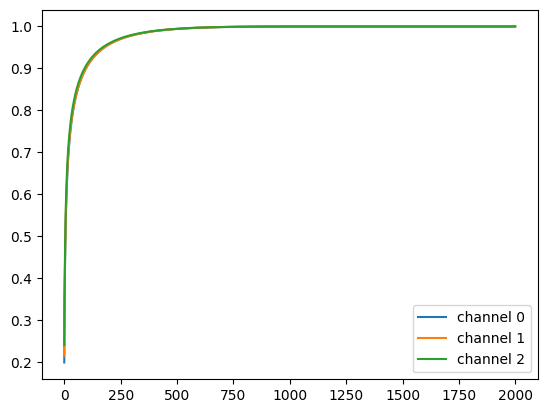

In [9]:
# plot the cumulative variance vs the number of components for each channel
for i, var in enumerate(variances):
    plt.plot(np.cumsum(var), label=f'channel {i}')
plt.legend()
plt.show()

### 2.) b.

The error of p = 50 and channel red equals: 1.0251166820526123
The error of p = 50 and channel green equals: 1.0313560962677002


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The error of p = 50 and channel blue equals: 1.0266164541244507


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The error of p = 250 and channel red equals: 8.512659072875977
The error of p = 250 and channel green equals: 8.68380069732666


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The error of p = 250 and channel blue equals: 8.666154861450195


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The error of p = 500 and channel red equals: 50.18666076660156
The error of p = 500 and channel green equals: 46.46965789794922


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The error of p = 500 and channel blue equals: 44.031471252441406


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


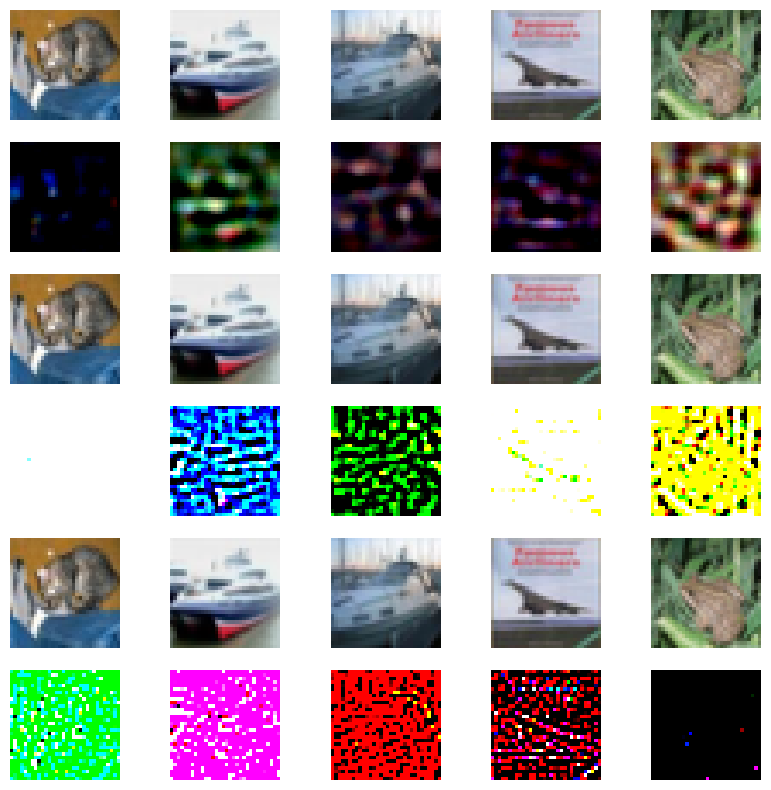

In [31]:
p =  [50, 250, 500]
off = 0
chan_names = ['red', 'green', 'blue']
plt.figure(figsize=(10, 10))
for i in p:
    channels = []
    for j, channel in enumerate([red, green, blue]):
        eigenvalues_p = eigens[j][0][:i]
        eigenvectors_p = eigens[j][1][:,:i]

        # calculate the projection matrix
        projection_matrix = eigenvectors_p @ np.diag(eigenvalues_p ** -0.5)

        # project the data
        projected_data = channel.T @ projection_matrix

        # reconstruct the data
        reconstructed_channel = projected_data @ projection_matrix.T

        # calculate the error
        error = np.linalg.norm(channel - reconstructed_channel.T) / np.linalg.norm(channel)
        print(f"The error of p = {i} and channel {chan_names[j]} equals: {error}")

        channels.append(reconstructed_channel.T)

    reconstructed_data = np.stack(channels, axis=3)

    # visualize the p and compare with original images
    # visualize the original and reconstructed images
    for j in range(5):
        plt.subplot(6, 5, j + off + 1)
        plt.imshow(test_set[j])
        plt.axis('off')
        plt.subplot(6, 5, j + off + 6)
        plt.imshow(reconstructed_data[j])
        plt.axis('off')
    off += 10
plt.show()